<a href="https://colab.research.google.com/github/okolenchuk/IT_Academy_final_project/blob/main/SD_generate_avatars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Just run this cell. 
#@markdown This cell installs all requirements and checks type of GPU available. \ 
#@markdown It's not going to work if GPU not avaliable or less than 15Gb 😞
!git clone https://github.com/okolenchuk/IT_Academy_final_project
!pip install -qq -r /content/IT_Academy_final_project/requirements.txt
!mkdir /content/foto
import warnings
warnings.filterwarnings('ignore')
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Cloning into 'IT_Academy_final_project'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (311/311), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 311 (delta 160), reused 235 (delta 87), pack-reused 0
Receiving objects: 100% (311/311), 87.00 KiB | 17.40 MiB/s, done.
Resolving deltas: 100% (160/160), done.
     |████████████████████████████████| 1.2 MB 27.2 MB/s 
     |████████████████████████████████| 62.5 MB 22 kB/s 
     |████████████████████████████████| 191 kB 3.9 MB/s 
     |████████████████████████████████| 5.8 MB 57.6 MB/s 
     |████████████████████████████████| 453 kB 67.1 MB/s 
     |████████████████████████████████| 182 kB 63.9 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 9.2 MB 73.6 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 7.6 MB 67.1 MB/s 
     |████████████████████████████████| 2.1 MB 59.1 MB/s 
     |████

In [2]:
#@title Parameters

#@markdown Directory to save trained model.

from pathlib import Path
save_to_GoogleDrive = False #@param {type:"boolean"}

if save_to_GoogleDrive:
  from google.colab import drive
  drive.mount('/content/drive')
  OUTPUT_DIR = str(Path('/content/drive/MyDrive/').joinpath('/trained_model'))
else:
  OUTPUT_DIR = '/content/trained_model'

#path to save generatedd class photos
INPUT_DIR = '/content/foto/class' 

gender = "woman" #@param ["man", "woman"]
CLASS_NAME = 'photo_of_a_{}'.format(gender) 

SD_VERSION = 'runwayml/stable-diffusion-v1-5'
#@markdown You can choose number of train steps. I reccommend 3000 steps for better perfomance.
NUM_TRAIN_STEPS = 1000 #@param {type:"integer"}
#@markdown Type your specific name or nickname. It also can be random unique set of letters with which the model will associate your image
instance = 'okolenchuk' #@param {type:"string"}
INSTANCE_NAME = 'photo_of_{}'.format(instance.replace(' ', '')) 
INSTANCE_DIR = '/content/foto' 
#@markdown Input number of samples that will be saved at the end of training
NUM_SAVE_SAMPLES = 5 #@param {type:"integer"}

In [ ]:
#@markdown Upload your images by running this cell.

#@markdown OR

#@markdown You can use the file manager on the left panel to upload (drag and drop) to /content/foto' (it uploads faster). \
#@markdown I reccomend to use at least 10 photos where you can clearly see your face. And use photos with only your face for better quality.

import os
from google.colab import files
import shutil

print(f"Uploading instance images for `{INSTANCE_NAME}`")
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(INSTANCE_DIR, filename)
  shutil.move(filename, dst_path)

In [ ]:
#@title Train script.
!python /content/IT_Academy_final_project/run.py \
--output_dir=$OUTPUT_DIR \
--instance_data_dir=$INSTANCE_DIR \
--class_data_dir=$INPUT_DIR \
--instance_prompt=$INSTANCE_NAME \
--num_class_images=50 \
--class_prompt=$CLASS_NAME \
--pretrained_model_name_or_path=$SD_VERSION \
--use_8bit_adam \
--learning_rate=1e-6 \
--max_train_steps=$NUM_TRAIN_STEPS \
--num_train_epochs=1 \
--save_sample_prompt=$INSTANCE_NAME \
--n_save_sample=$NUM_SAVE_SAMPLES \
--train_text_encoder 

FileNotFoundError: ignored

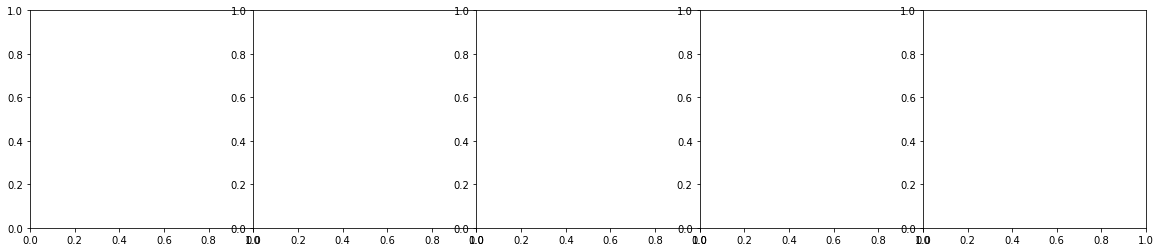

In [5]:
#@title Run to generate a grid of preview of the last saved samples.
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

folders = [OUTPUT_DIR]
row = 1
col = NUM_SAVE_SAMPLES
scale = 4
fig, axes = plt.subplots(row, col, figsize=(col*scale, row*scale), gridspec_kw={'hspace': 0, 'wspace': 0})

for i, folder in enumerate(folders):
    folder_path = os.path.join(OUTPUT_DIR, folder)
    image_folder = os.path.join(folder_path, "samples")
    images = [f for f in os.listdir(image_folder)]
    for j, image in enumerate(images):
        if row == 1:
            currAxes = axes[j]
        else:
            currAxes = axes[i, j]
        if i == 0:
            currAxes.set_title(f"Image {j}")
        image_path = os.path.join(image_folder, image)
        img = mpimg.imread(image_path)
        currAxes.imshow(img, cmap='gray')
        currAxes.axis('off')
        
plt.tight_layout()
plt.savefig('grid.png', dpi=72)

In [6]:
#@title INFERENCE. 

#@markdown If you want to use presaved prompts to generate image with your character. \
#@markdown If not active images will be generated with random prompt from [Lexica.art](https://lexica.art/) without you as character
use_saved_prompts = True #@param {type:"boolean"}
#@markdown You can also add hint to your random prompt by word
word = '' #@param {type:"string"}


#@markdown Your images will be saved in /content/trained_model/generated or in path on your Google Drive
save_to_GoogleDrive = False #@param {type:"boolean"}
if save_to_GoogleDrive:
  from google.colab import drive
  google_path = '' #@param {type:"string"}
  drive.mount('/content/drive')
  save_path = str(Path('/content/drive/MyDrive/').joinpath(google_path))
else:
  save_path = '/content/trained_model/generated' 

#@markdown Input number of images you want to generate. 1 image takes about 30 sec to generate. 
number_of_images = 10 #@param {type:"integer"}
#@markdown Number of inference steps. The higher the number, the better the result, but it can take a significant amount of time. I reccomend number between 100-200
n_infer_steps = 100 #@param {type:"integer"}

In [ ]:
#@title MAGIC ✨✨✨
!python /content/IT_Academy_final_project/creation.py \
--instance_name=$INSTANCE_NAME \
--gender=$gender \
--n_images=$number_of_images \
--save_infer_steps=$n_infer_steps \
--save_path=$save_path \
--word=$word \
--use_saved_prompts=$use_saved_prompts

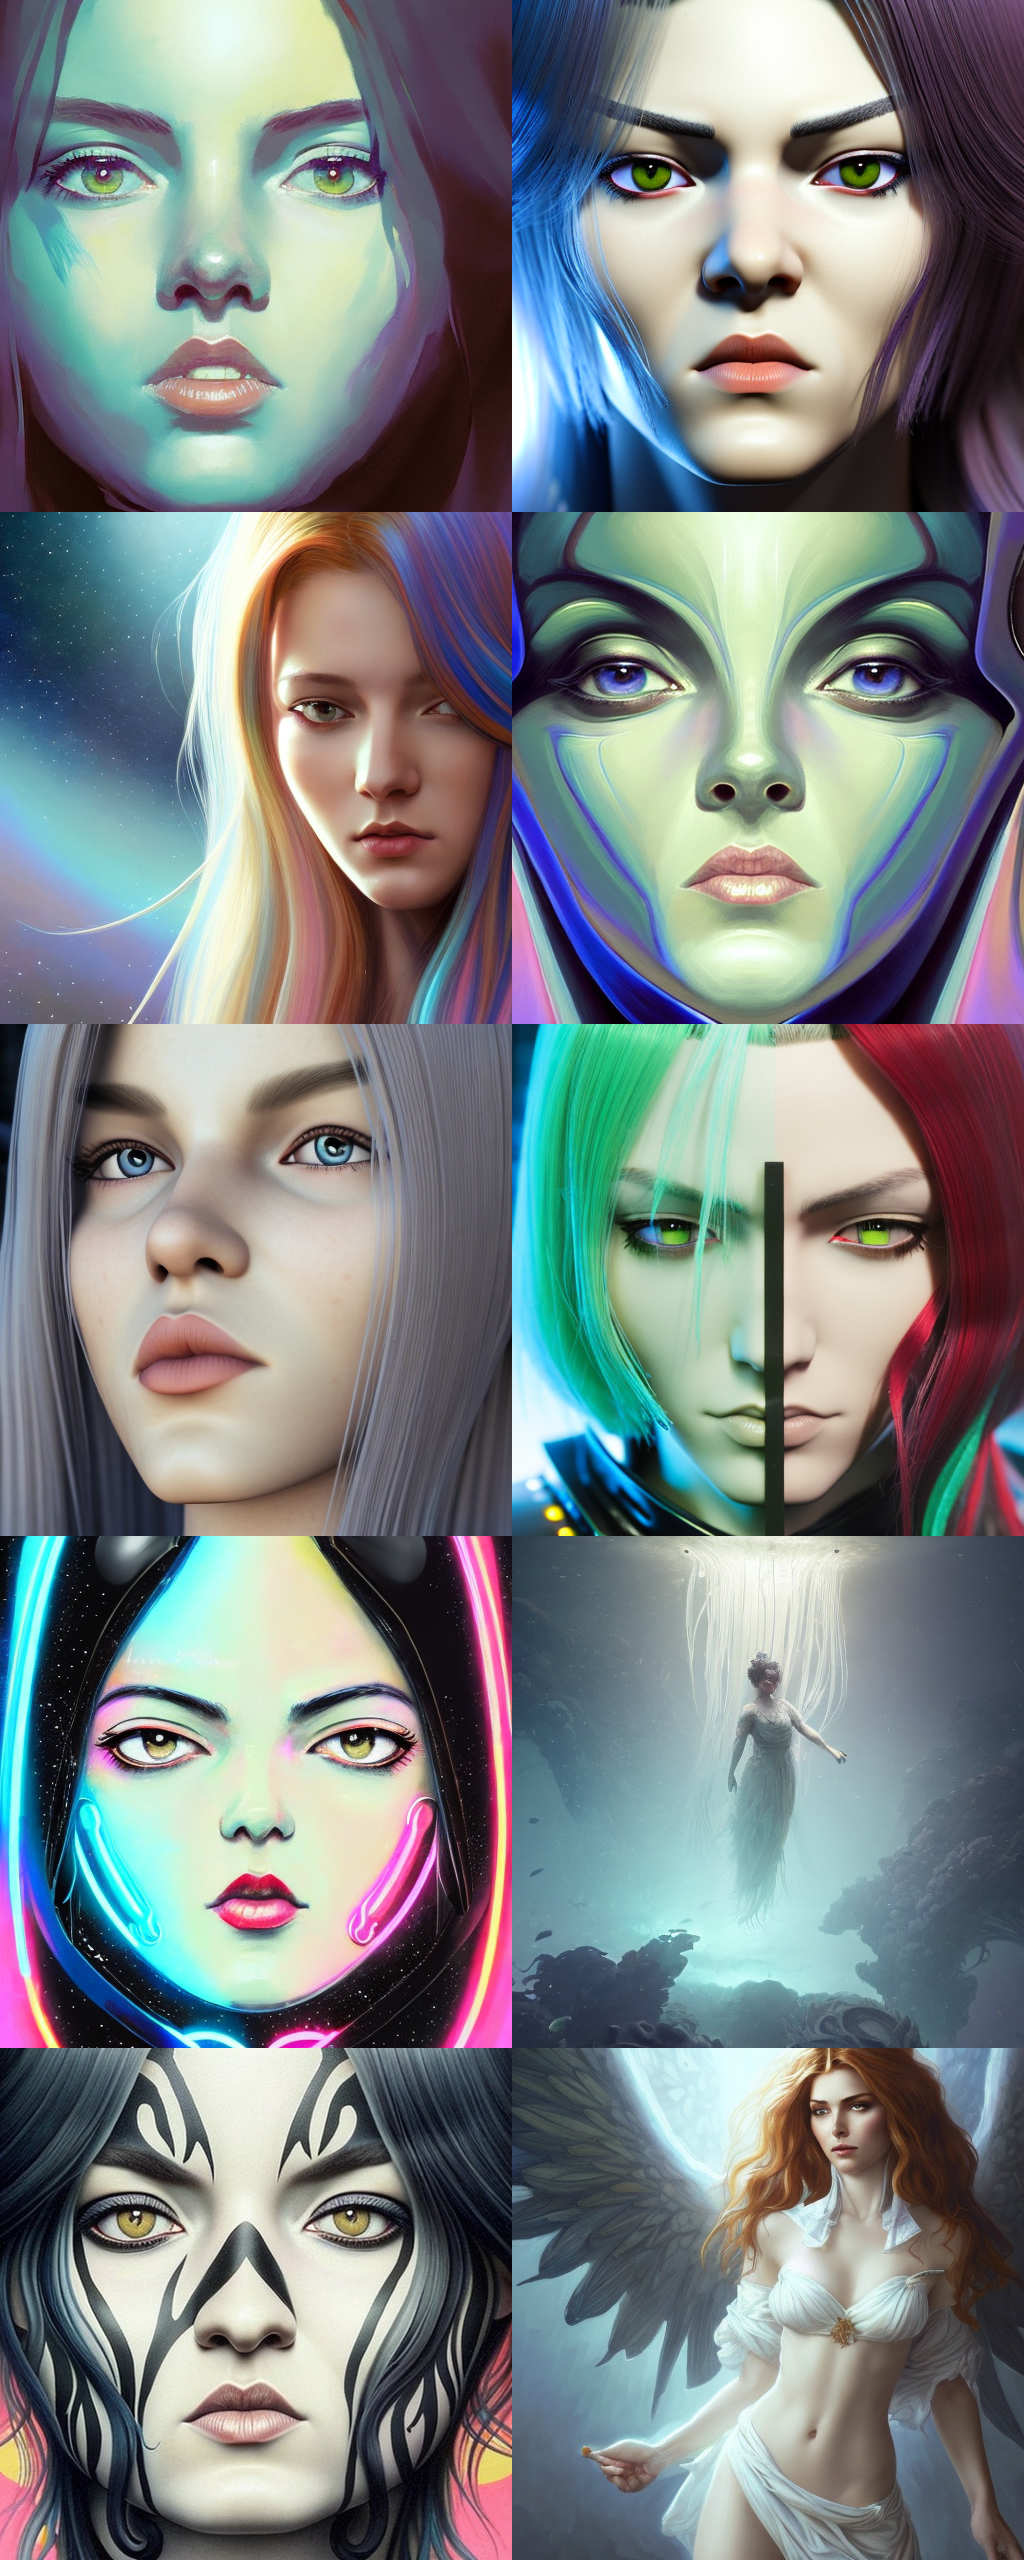

In [20]:
#@markdown At the end of generating all images will be shown below as 1 image. \
#@markdown But you can also save all of them from save path, or your Google Drive
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

paths = Path(save_path).glob('*.png')
imgs=[Image.open(str(p), mode='r') for p in paths]
grid = image_grid(imgs, rows=len(imgs)//2, cols=2)
display(grid)

In [21]:
#@markdown Run to create pipe for custom image generation in next cell.
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

model_path = OUTPUT_DIR            
scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
pipe = StableDiffusionPipeline.from_pretrained(model_path, scheduler=scheduler, safety_checker=None, torch_dtype=torch.float16).to("cuda")

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/100 [00:00<?, ?it/s]

<class 'PIL.Image.Image'>


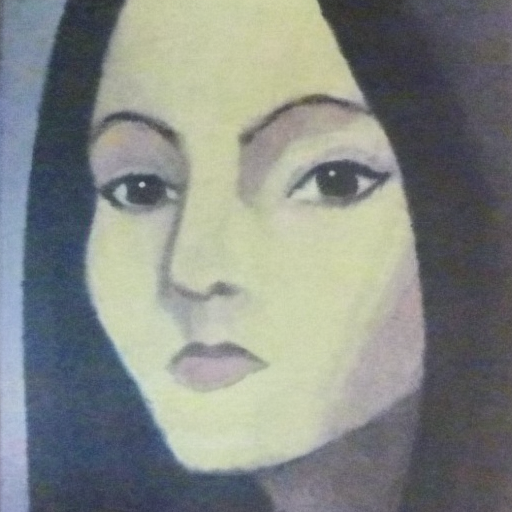

<class 'PIL.Image.Image'>


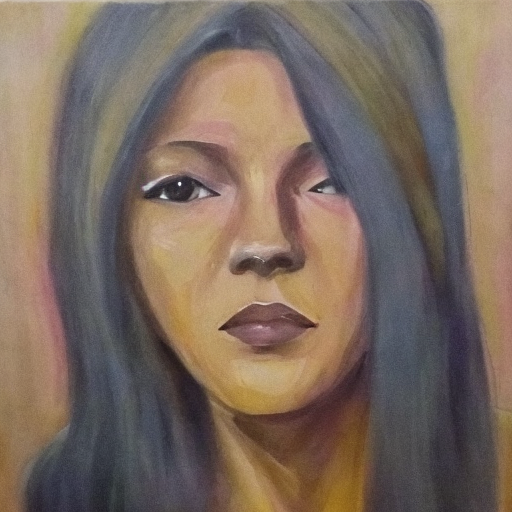

<class 'PIL.Image.Image'>


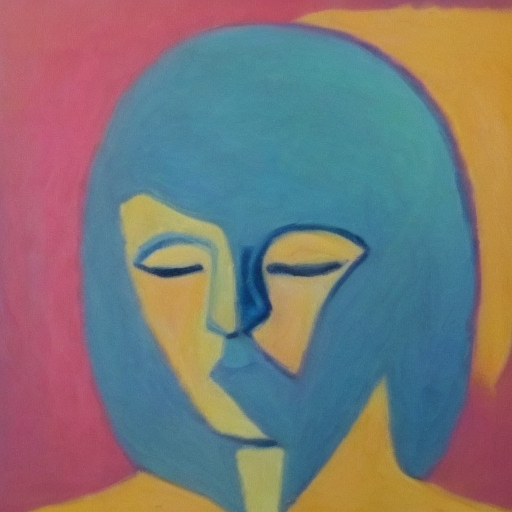

<class 'PIL.Image.Image'>


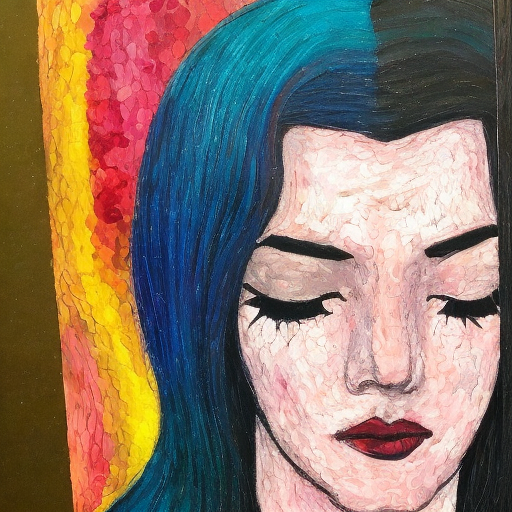

In [22]:
#@title Run for generating images.

#@markdown You can use [Lexica.art](https://lexica.art/) for some inspiration. Just replace name of character with your instance name, that was used in training.
from IPython.display import display
import torch
from torch import autocast

prompt = "woman" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
num_samples = 4 #@param {type:"number"}
guidance_scale = 7.5 #@param {type:"number"}
num_inference_steps = 100 #@param {type:"number"}
height = 512 #@param {type:"number"}
width = 512 #@param {type:"number"}

with autocast('cuda'), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=torch.Generator(device='cuda')
    ).images

for img in images:
    display(img)